In [4]:
import pandas as pd

In [ ]:
#STEP 1 :- Importing the data

In [2]:
df=pd.read_csv(r'~/Desktop/HealthCare_Insurance_Segmentation/Datasets/data_cleaned.csv')

In [3]:
df_new=df.drop(["Claim_Cancellation","Renewal"], axis=1)

In [ ]:
#STEP 2 :- Standardizing

In [5]:
from sklearn.preprocessing import scale
df_scale=scale(df_new)

In [6]:
#STEP 3 :- PCA 

In [15]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import numpy as np

pca = PCA(n_components=34)  # Principal component on 35 columns
pca_values = pca.fit_transform(df_scale)
var = pca.explained_variance_ratio_
var1 = np.cumsum(np.round(var, decimals=4) * 100)
print("Variance Ratio: ", var1)

Variance Ratio:  [10.61 18.16 24.28 29.85 35.03 39.1  42.73 46.25 49.63 52.86 56.06 59.17
 62.19 65.18 68.14 71.06 73.89 76.67 79.28 81.88 84.45 86.88 89.26 91.58
 93.58 95.49 96.47 97.29 97.98 98.62 99.09 99.54 99.89 99.99]


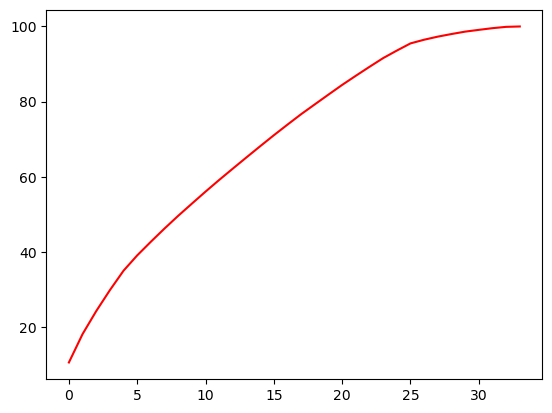

In [8]:
# Variance plot for PCA components obtained 
plt.plot(var1, color = "red")

In [11]:
pca_data = pd.DataFrame(pca_values)

In [14]:
# Naming the PCA columns
name = []
for i in range(1, 35):
    a = "PC" + str(i)
    name.append(a)
pca_data.columns = name
# Considering only 26 PCA as they summarize 91% of the data, so dropping 9 PCA
final = pd.concat([pca_data.iloc[:, 0:25], df["Renewal"]], axis=1)

In [17]:
df.to_csv(r'~/Desktop/HealthCare_Insurance_Segmentation/Datasets/FE_data.csv', index=False)